# Reasonable Recommendations - A joke recommender system

A short description of our project.

#### Summary

1. Dataset EDA
    1. #jokes rated per user
    2. #ratings per joke
    3. Joke ratings long plot tail
2. Binarise Dataset
3. Popularity based recommender
    1. Evaluation (not done)
    2. Explanation (not done)
4. ItemItem recommender
    1. Evaluation (not done)
    2. Explanation (not done)
5. Content Based with joke labels and joke text
    1. Evaluation (not done)
    2. Explanation (not done)
6. Hybrid (Parallel Switching: Based on X ratings we switch from CB to CF ItemItem)
    1. Evaluation (not done)
    2. Explanation (not done)
7. Group Recommender Recommendation Aggregation (input: group list, recommender name above; output: Aggregated recommendations of all users in the group) 
    1. Evaluation (not done)
    2. Explanation (not done)
8. Evaluation of Explanations (not done)

## 1. Dataset EDA

A short description of our data set and where we got it from.

In [264]:
from IPython.core.display_functions import display
from itertools import product
import pandas as pd
import seaborn as sns
import plotly.express as px
ratings_df = pd.read_csv("jester_ratings.csv")
display(ratings_df)

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875
...,...,...,...
1761434,63978,57,-8.531
1761435,63978,24,-9.062
1761436,63978,124,-9.031
1761437,63978,58,-8.656


In [265]:
jokes_df = pd.read_csv("jester_items.csv")
jokes_df.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


Next we plot the number of jokes rated (y-axis) by each user (x-axis).

,userId,ratings_count
0,1,62
1,2,34
2,3,18
3,4,3
4,5,82
...,...,...
59127,63974,10
59128,63975,8
59129,63976,3
59130,63977,9


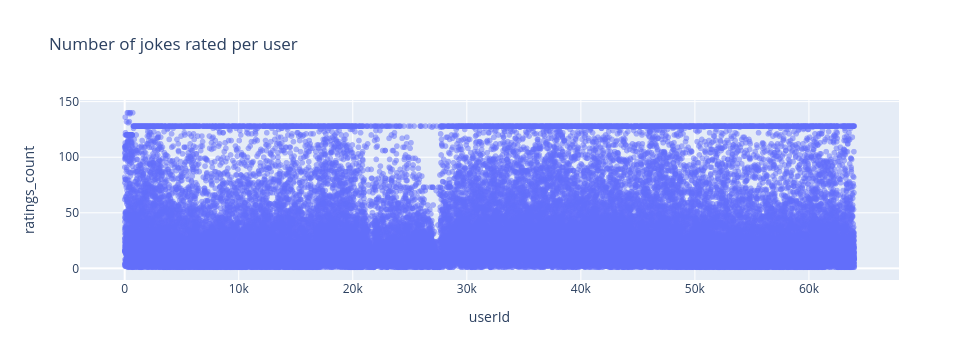

In [266]:
count_user_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['userId']).count().reset_index()
count_user_ratings_df.columns = ['userId', 'ratings_count']
display(count_user_ratings_df)
fig = px.scatter(count_user_ratings_df, x='userId', y='ratings_count', title='Number of jokes rated per user', opacity=0.5)
fig.show()

,jokeId,ratings_count
0,5,661
1,7,59122
2,8,57720
3,13,56333
4,15,54932
...,...,...
135,146,4913
136,147,9728
137,148,14988
138,149,10969


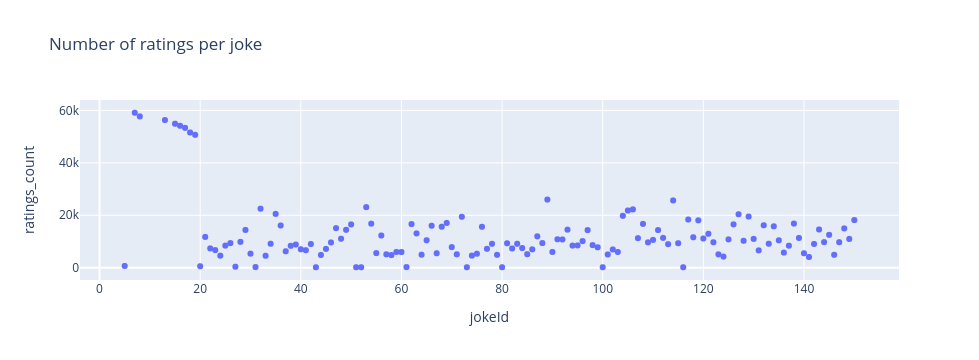

In [267]:
count_joke_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['jokeId']).count().reset_index()
count_joke_ratings_df.columns = ['jokeId', 'ratings_count']
display(count_joke_ratings_df)
fig = px.scatter(count_joke_ratings_df, x='jokeId', y='ratings_count', title='Number of ratings per joke')
fig.show()

,level_0,index,jokeId,ratings_count
0,0,1,7,59122
1,1,2,8,57720
2,2,3,13,56333
3,3,4,15,54932
4,4,5,16,54150
...,...,...,...,...
135,135,62,73,167
136,136,69,80,167
137,137,105,116,166
138,138,32,43,166


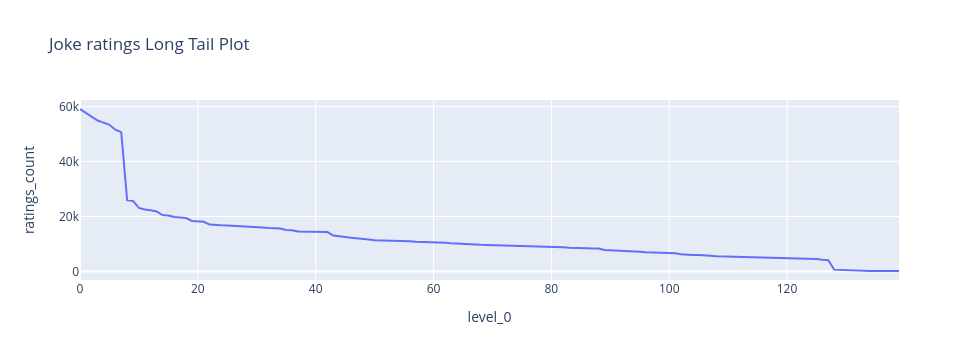

In [268]:
count_ratings_df_ord = count_joke_ratings_df.sort_values(by="ratings_count", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
fig = px.line(count_ratings_df_ord, x="level_0", y="ratings_count", title='Joke ratings Long Tail Plot')
fig.show()

In [269]:
# ratings_df.groupby('jokeIdvar()

## 2. Binarise dataset

In [270]:
ratings_df.loc[(ratings_df['rating'] > 0), 'like/dislike'] = 1
ratings_df.loc[(ratings_df['rating'] <= 0), 'like/dislike'] = 0
ratings_df.head()

,userId,jokeId,rating,like/dislike
0,1,5,0.219,1.0
1,1,7,-9.281,0.0
2,1,8,-9.281,0.0
3,1,13,-6.781,0.0
4,1,15,0.875,1.0


## 3. Popularity based recommender

In [271]:
#two types of popularity: sum ratings or substract negative binary ratings from positive binary ratings
def popularity_recommender(n_desc_rankings, popularity_type):
    if (popularity_type=='ratings'):
        #sum ratings
        popular_jokes_df = ratings_df[[ 'jokeId', 'rating', 'like/dislike']].groupby(['jokeId']).sum()
        popular_jokes_df = popular_jokes_df.sort_values('rating', ascending=False).reset_index()
    if (popularity_type=='like/dislike'):
        popular_jokes_df = ratings_df[[ 'jokeId', 'rating', 'like/dislike']].groupby(['jokeId', 'like/dislike']).count().reset_index()
        like_df = popular_jokes_df[popular_jokes_df['like/dislike']==1].set_index('jokeId')
        like_df=like_df.rename(columns = {'rating':'like_count'})
        dislike_df = popular_jokes_df[popular_jokes_df['like/dislike']==0].set_index('jokeId')
        dislike_df=dislike_df.rename(columns = {'rating':'dislike_count'})
        like_df['dislike_count'] = dislike_df['dislike_count']
        like_df['sum'] = like_df['like_count'] - like_df['dislike_count']
        popular_jokes_df = like_df.sort_values('sum', ascending=False).reset_index()
    # get the right amount of jokes
    jokes_ranked_df = popular_jokes_df.iloc[:n_desc_rankings,:]
    #drop useless columns and add joke text
    df = jokes_ranked_df.join(jokes_df, on='jokeId', lsuffix='jokeId')
    df.drop(['jokeIdjokeId'], axis=1, inplace=True)
    return df
print('We recommended these jokes as they are the most popular among all users!')
display(popularity_recommender(10, 'ratings'))
display(popularity_recommender(10, 'like/dislike'))

We recommended these jokes as they are the most popular among all users!


,rating,like/dislike,jokeId,jokeText
0,93754.722,21120.0,90,Q: How many programmers does it take to change...
1,85809.628,19263.0,54,"The Pope dies and, naturally, goes to heaven. ..."
2,81933.613,20435.0,115,A lady bought a new Lexus. It cost a bundle. T...
3,80986.306,18244.0,106,An engineer dies and reports to the pearly gat...
4,78923.226,18411.0,33,What do you call an American in the finals of ...
5,74279.025,17720.0,107,(A) The Japanese eat very little fat and suffe...
6,73071.695,16721.0,36,"A guy walks into a bar, orders a beer and says..."
7,69910.421,15710.0,130,An old man goes to the doctor for his yearly p...
8,68084.439,16080.0,73,Q: What is the difference between George Wash...
9,67747.411,16328.0,105,A couple of hunters are out in the woods in th...


,like/dislike,like_count,dislike_count,sum,jokeId,jokeText
0,1.0,21120,4876,16244,90,Q: How many programmers does it take to change...
1,1.0,19263,3839,15424,54,"The Pope dies and, naturally, goes to heaven. ..."
2,1.0,20435,5227,15208,115,A lady bought a new Lexus. It cost a bundle. T...
3,1.0,18244,3578,14666,106,An engineer dies and reports to the pearly gat...
4,1.0,18411,4108,14303,33,What do you call an American in the finals of ...
5,1.0,17720,4533,13187,107,(A) The Japanese eat very little fat and suffe...
6,1.0,16721,3803,12918,36,"A guy walks into a bar, orders a beer and says..."
7,1.0,16328,3465,12863,105,A couple of hunters are out in the woods in th...
8,1.0,16080,3341,12739,73,Q: What is the difference between George Wash...
9,1.0,15710,3799,11911,130,An old man goes to the doctor for his yearly p...


In [272]:
subset = ratings_df['rating'] > 7
users = ratings_df.loc[subset]
sample = users.sample()
column = sample.reset_index()['userId']
user = column.iloc[0]
print(f'Selected user: {user}')

Selected user: 37457


In [273]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import PopScore

def PopScoreRecommender(user, n_desc_rankings, ratings, items):
    _ratings = ratings.rename(columns={'userId':'user', 'jokeId':'item'})
    _jokes = items.rename(columns={'jokeId':'item'})

    Pop_Score = PopScore('count')
    recsys = Recommender.adapt(Pop_Score)
    recsys.fit(_ratings)

    recommendations = recsys.recommend(user, n_desc_rankings)
    recommended_jokes = recommendations.join(_jokes['jokeText'], on='item')
    
    print('We recommended these jokes as they are the most popular among all users!')
    display(recommended_jokes)
PopScoreRecommender(user, 5, ratings_df, jokes_df)

We recommended these jokes as they are the most popular among all users!


,item,score,jokeText
0,89,25996,Q: How many programmers does it take to change...
1,32,22519,What do you call an American in the finals of ...
2,106,22253,(A) The Japanese eat very little fat and suffe...
3,104,19793,A couple of hunters are out in the woods in th...
4,150,18171,NaN


### 3.1 Evaluation

### 3.2 Explanation

For the popularity based recommender we simply state that we are choosing the most popular jokes among our user base.

## 4. ItemItem for random user (individual)

Just like in the lab, let's select a user randomly and recommend something to them.

In [274]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.item_knn import ItemItem

def ItemItemRecommender(user, n_desc_rankings, ratings, items):
    _ratings = ratings.rename(columns={'userId':'user', 'jokeId':'item'})
    _jokes = items.rename(columns={'jokeId':'item'})

    item_item = ItemItem(20, min_nbrs=5, feedback='explicit')
    recsys = Recommender.adapt(item_item)
    recsys.fit(_ratings)

    #use random jokes when we don't have enough user ratings yet
    #if user.numberOfRatings < minValue: #let user rate at least minValue jokes before starting personal recommendations
        #print('We selected a few jokes at random to get a feel for your sense of humour!')
        #display(random_jokes)
    
    #else:
    recommendations = recsys.recommend(user, n_desc_rankings)
    recommended_jokes = recommendations.join(_jokes['jokeText'], on='item')
    
    print('We recommended these jokes because you liked previous jokes that received similar ratings!')
    display(recommended_jokes)
ItemItemRecommender(user, 5, ratings_df, jokes_df)

We recommended these jokes because you liked previous jokes that received similar ratings!


,item,score,jokeText
0,132,8.501985,The new employee stood before the paper shredd...
1,89,8.500735,Q: How many programmers does it take to change...
2,32,8.230018,What do you call an American in the finals of ...
3,50,8.199677,Did you hear that Clinton has announced there ...
4,21,8.166739,A duck walks into a pharmacy and asks for a co...


### 4.1 Item Item Evaluation 

In [275]:
#Can use the following measures:
# -Coverage: percentage of items from the dataset ever recommended
# -Personalisation: 0: No personalisation, 1: Entirely personalised
# -

### 4.2 Item Item Explanation 

For the item based recommender we first explain that we are showing a collection of random jokes to get a feel for the users direction, then once we start recommending jokes based on the users preferences we explain briefly that the results are based on jokes that the user liked previously. These explanations primarily build on the pillar of transparency.

#### Popularity bias

## 5. Content Based with joke labels and joke text

In [276]:
labeled_jokes_df = pd.read_csv("jester_items-Copy1.csv")
labeled_ratings_df = ratings_df.copy()

#here we update the columns with the labels
for index, row in labeled_jokes_df.iterrows():
    label_list = row['labels'].split("/")
    for label in label_list:
        labeled_jokes_df.at[index, label] = 1
        #add these labels to each joke rating (to pretend it is a user rating)
        labeled_ratings_df.loc[(labeled_ratings_df['jokeId']==row['jokeId']), label] = 1
    
labeled_jokes_df.fillna(0, inplace=True)
labeled_ratings_df.fillna(0, inplace=True)
labeled_jokes_df.drop(['labels'], axis=1, inplace=True)

label_counts = labeled_jokes_df.sum()
display(labeled_jokes_df.head())
display(label_counts)
display(labeled_ratings_df.head())

,jokeId,jokeText,doctor,ironic,dark,situational,one-liner,relationship,story,deprecating,farcical,observational
0,1,"A man visits the doctor. The doctor says ""I ha...",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,This couple had an excellent relationship goin...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Q. What's the difference between a man and a t...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


jokeId                                                       11325
jokeText         A man visits the doctor. The doctor says "I ha...
doctor                                                           7
ironic                                                          32
dark                                                            15
situational                                                     21
one-liner                                                       51
relationship                                                    30
story                                                           82
deprecating                                                     29
farcical                                                        11
observational                                                    4
dtype: object

,userId,jokeId,rating,like/dislike,doctor,ironic,dark,situational,one-liner,relationship,story,deprecating,farcical,observational
0,1,5,0.219,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,7,-9.281,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1,8,-9.281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,13,-6.781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,15,0.875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [277]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder
# Encoder = LabelEncoder()
# labeled_jokes_df['jokeText'] = Encoder.fit_transform(labeled_jokes_df['jokeText'])
# Tfidf_vect = TfidfVectorizer(max_features=5000)
# Tfidf_vect.fit(labeled_jokes_df['jokeText'])
# result = Tfidf_vect.transform(Train_X)

In [278]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

def most_similar_jokes(labeled_jokes_df, liked_joke_id, n_desc_rankings):
    df = labeled_jokes_df.copy()
    df.drop(['jokeId', 'jokeText'], axis=1, inplace=True)
    matrix = cosine_similarity(df)
    #we have a matrix of arrays of the similarity of that joke to all other jokes
    #to recommend n jokes to a user we need a joke they like
    jokes_sim_list = list(matrix[liked_joke_id-1])
    jokes_sim_top = sorted(((value, index) for index, value in enumerate(jokes_sim_list)), reverse=True)
    jokes_top_indices = []
    cos_sim = []
    for i in range(n_desc_rankings):
        jokes_top_indices.append(jokes_sim_top[i][1])
        cos_sim.append(jokes_sim_top[i][0])
    df = df.iloc[jokes_top_indices].reset_index()
    df.rename(columns = {'index':'jokeId'}, inplace = True)
    df = df.join(jokes_df, on='jokeId', lsuffix='jokeId')
    df.drop(['jokeIdjokeId'], axis=1, inplace=True)
    df['cos_sim'] = cos_sim
    return df

def content_based(user,  n_desc_rankings, ratings, whatever_dont_touch_this):
    user_df = ratings.loc[ratings_df['userId']==user]
    user_df = user_df.loc[user_df['like/dislike']==1].sort_values('rating', ascending=False)
    liked_jokes = list(user_df['jokeId'])
    chosen_joke = random.choice(liked_jokes)
    labeled_jokes_df_tags = pd.read_csv("jester_items-Copy1.csv")
    chosen_tags = labeled_jokes_df_tags.loc[labeled_jokes_df_tags['jokeId']==chosen_joke]['labels'].iloc[0]
    print("We recommended these jokes because you seem to like " + chosen_tags + " jokes!") 
    return most_similar_jokes(labeled_jokes_df, chosen_joke, n_desc_rankings)
content_based(17,  10, ratings_df, None)

We recommended these jokes because you seem to like story/deprecating jokes!


,doctor,ironic,dark,situational,one-liner,relationship,story,deprecating,farcical,observational,jokeId,jokeText,cos_sim
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,131,A guy had been feeling down for so long that h...,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,120,"Judy was having trouble with her computer, so ...",1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,116,A man in a hot air balloon realized he was los...,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,115,A lady bought a new Lexus. It cost a bundle. T...,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,106,An engineer dies and reports to the pearly gat...,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,66,"A lawyer opened the door of his BMW, when sudd...",1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,62,A group of managers were given the assignment...,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,59,The Chukcha (Russian Eskimo) phones up the Rus...,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,49,Three engineering students were gathered toget...,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,45,A boy comes home from school and tells his mot...,1.0


### 5.1 Evaluation

### 5.2 Explanation

## 6. Hybrid (Parallel Switching: Based on X ratings we switch from CB to CF ItemItem)

In [280]:
def hybrid(user,  n_desc_rankings):
    X = 5
    user_ratings_len = len(ratings_df.loc[ratings_df['userId']==user])
    if (user_ratings_len<=X):
        df = content_based(user,  n_desc_rankings)
        print(user_ratings_len)
    else:
        df = ItemItemRecommender(user, n_desc_rankings, ratings_df, jokes_df)
    return df
hybrid(15,  10)
ItemItemRecommender(user, 5, ratings_df, jokes_df)

TypeError: content_based() missing 2 required positional arguments: 'ratings' and 'whatever_dont_touch_this'

### 6.1 Evaluation

### 6.2 Explanation


## 7. Prototype group recommender system

##### Assumption 1: If a user rates a joke above 0 it means they like it, and therefore they found it funny.

The ratings in our dataset range from -10 to +10, but the event of a user laughing at a joke is binary; a person either laughs or doesn't laugh. How can we infer this from ratings? We can approach this in two ways, either we can assume that if the rating is above 0 the user laughs, or we can assume that if the rating is above the average or median (with respect to that user), then the user laughs. Using the median or the mean poses a problem. If a user usually laughs at every joke, by thresholding the binary variable like this, we would actually force a pessimistic prediction of the user's response. Therefore, we decided to fix the threshold at 0, which (we hope) is a natural point for most people when providing feedback over a symmetric range such as (-10, +10).

##### Assumption 2: In a group, humor is contagious. Regardless of the direction it pulls from (e.g. funny or unfunny).

We think that, in a group, if not all members laugh at the jokes recommended and this is remains a consistent pattern, the group will stop using the app. Our goal is therefore to make as many people laugh in group as possible. In other words, we want the recommendations to score always above 0 for all members of the group.

##### Assumption 3: Group settings are fundamentally different from individual settings. Good group humor inflates positive ratings of other members.

We think that, if enough people in the group laugh at a joke and the other members at least like the joke, their positive perception of the joke is inflated. By this assumption, we don't care that much about how positive the ratings are, just that they are positive.


In order to produce a group, we sample from the set of all users from a discrete uniform distribution until a given group size is reached.

In [ ]:
def make_group(group_size):
    uset = []
    while len(uset) < group_size:
        subset = ratings_df['rating'] > 7
        users = ratings_df.loc[subset]
        sample = users.sample()
        column = sample.reset_index()['userId']
        user = column.iloc[0]
        if user not in uset:
            uset += [user]
    return uset

In [ ]:
group = make_group(2)
print(f'Group: {group}')

Now we rate the jokes and apply least misery and no misery strategies together, ensuring all members of the group find the joke at least mildly funny.

In [ ]:
def group_ratings(recommender, group, items):
    individual_ratings = [recommender.predict_for_user(user, items).values.tolist() for user in group]
    zipped_ratings = list(zip(*individual_ratings))
    min_ratings = [min(zipped) for zipped in zipped_ratings]
    return min_ratings

In [ ]:
group_ratings_df = pd.DataFrame({'item': _jokes['item'], 'rating': group_ratings(item_item, group, _jokes['item'])})
no_nans = group_ratings_df.dropna()
above_threshold = no_nans[no_nans.rating > 0]
# Here we remove jokes already suggested in a previous round.
sorted_ratings = above_threshold.sort_values('rating', ascending=False)

In [ ]:
display(sorted_ratings)

### 7.1 Evaluation

### 7.2 Explanation

## 8. Evaluations of Explanations